In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math 
import os


#### The non-commutivity of shear wave splitting operators at lowfrequencies and implications for anisotropy tomography

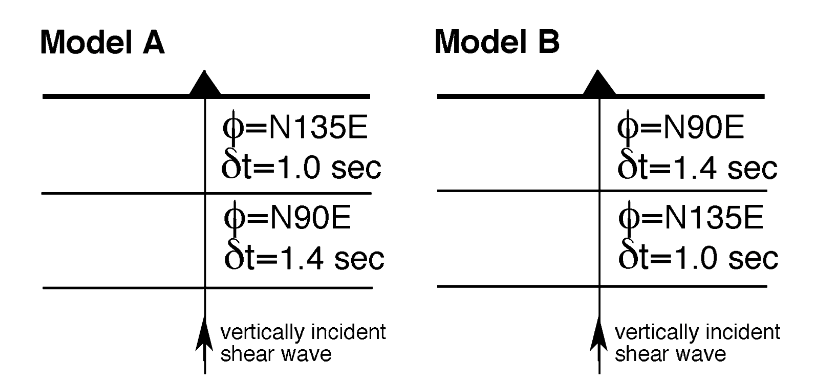


In [2]:
def SS1994(alpha1,alpha2, theta1, theta2):
    #====================full experssion  SS1994
    ap = np.cos(theta1)*np.cos(theta2)-\
        np.sin(theta1)*np.sin(theta2)*np.cos((alpha2-alpha1))  ##eq4

    ap_orth = -1*np.sin(theta1)*np.sin(theta2)*np.sin((alpha2-alpha1)) ##eq5

    Cc = np.cos(theta1)*np.sin(theta2)*np.cos(alpha2)+\
        np.cos(theta2)*np.sin(theta1)*np.cos(alpha1)  ##eq6

    Cs = np.cos(theta1)*np.sin(theta2)*np.sin(alpha2)+\
        np.cos(theta2)*np.sin(theta1)*np.sin(alpha1)  ##eq7 #paper wrong 
    
    #====================full experssion  SS1994
    ##equation 15 same as eq7 from SS1994
    tan_alphaa_num = (ap_orth**2 + Cs**2 )
    tan_alphaa_denum = (ap*ap_orth + Cs*Cc)
    if 0<tan_alphaa_denum < 10**-15 : tan_alphaa_denum=0

    alphaa=math.atan(tan_alphaa_num/ tan_alphaa_denum )
    ##equation 8 from  SS1994
    tan_thetaa_num = ap_orth
    tan_thetaa_denum = Cs*np.cos(alphaa) - Cc*np.sin(alphaa)

    if 0<tan_thetaa_denum < 10**-15 : tan_alphaa_denum=0
    #====================phi
    phia= 0.5 * alphaa / (np.pi/180) + baz  # unit: deg
    thetaa=math.atan(tan_thetaa_num/ tan_thetaa_denum)
    
    # print(thetaa)
    if -np.pi/2> thetaa:
        thetaa = thetaa + np.pi
    elif thetaa > np.pi/2:
        thetaa = thetaa - np.pi
        
    dta=thetaa / (np.pi*freq)# unit: s
    # print(dta)
    #=============================keep   
    if dta < 0 : 
        phia=phia + 90
        dta = abs(dta)
    else: pass

    PHIa = np.mod(phia,180)
    if PHIa>float(90): 
        PHIa = PHIa-180        
    return PHIa, dta

def Montager2000(alpha1,alpha2, theta1, theta2):
    ap      = 1
    ap_orth = - theta1*theta2*np.sin(alpha2-alpha1)
    Cc      = theta2*np.cos(alpha2) + theta1*np.cos(alpha1)
    Cs      = theta2*np.sin(alpha2) + theta1*np.sin(alpha1)
    tan_alphaa=Cs/Cc
    tan_thetaa=np.sqrt(Cc**2+Cs**2)
    
    alphaa=math.atan2(Cs, Cc)
    phia= 0.5*alphaa / (np.pi/180) + baz # unit: deg
    
    thetaa=math.atan(tan_thetaa)
    # print(thetaa)
    if -np.pi/2> thetaa:
        thetaa = thetaa + np.pi
    elif thetaa > np.pi/2:
        thetaa = thetaa - np.pi
    
    dta=thetaa / (np.pi*freq)# unit: s  
    #=============================keep   
    if dta < 0 : 
        phia=phia + 90
        dta = abs(dta)
    else: pass

    PHIa = np.mod(phia,180)
    if PHIa>float(90): 
        PHIa = PHIa-180     
        
    return PHIa, dta

def fitness(phi_obs,dt_obs,phi_syn,dt_syn):
    numsin1 = dt_obs*np.sin(2*(phi_obs*np.pi/180))
    numsin2 = dt_syn*np.sin(2*(phi_syn*np.pi/180))
    numcos1 = dt_obs*np.cos(2*(phi_obs*np.pi/180))
    numcos2 = dt_syn*np.cos(2*(phi_syn*np.pi/180))   
    std2    = 1 - (( (numsin1-numsin2)**2 + (numcos1-numcos2)**2 ) / ( numsin1**2 + numcos1**2 ))
    std     = np.sqrt(std2)
    
    return std

In [3]:
len(np.arange(-90,91,10))

19

<a list of 15 text.Text objects>

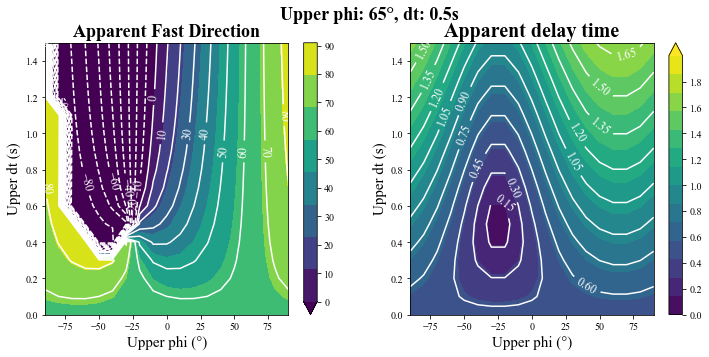

In [3]:
Upper = True

period=8
Mpredict = {'phi':np.zeros((19,16)), 'dt':np.zeros((19,16)),'std':np.zeros((19,16))}
baz=270
phi_upper= 65
# phi_upper = 65
dt_upper= 0.5

if Upper :
    title = f'Upper phi: {phi_upper}°, dt: {dt_upper}s'
    filename=f'forloop/UpperFIX.png'
else:
    title = f'Lower phi: {phi_lower}°, dt: {dt_lower}s'
    filename=f'forloop/LowerFIX.png'


for i, phi_lower in enumerate(np.arange(-90,91,10)):
    for j, dt_lower in enumerate(np.arange(0,1.6,0.1)):

        model={'phi':[phi_lower,phi_upper],
               'dt':[dt_lower,dt_upper]}

        ##===============================
        baz =np.mod(baz,90)
        freq=1/period
        # omega=2*np.pi/period # unit: rad/s

        phi1=model['phi'][0]-baz # unit: deg
        phi2=model['phi'][1]-baz # unit: deg
        alpha1=2*phi1*np.pi/180  # unit: rad
        alpha2=2*phi2*np.pi/180  # unit: rad
        theta1=np.pi*model['dt'][0]*freq # unit: rad
        theta2=np.pi*model['dt'][1]*freq   # unit: rad

        Mphi, Mdt = Montager2000(alpha1, alpha2, theta1, theta2)
#         Mstd = fitness(phi_obs,dt_obs,Mphi,Mdt) 
        Mpredict['phi'][i,j]= Mphi
        Mpredict['dt'][i,j] = Mdt
#         Mpredict['std'][i,j] = Mstd
        if phi_upper==20 and dt_upper==0.5:
            print(Mphi,Mdt)

plt.figure(figsize=(12,5))
plt.rcParams["font.family"] = "Times New Roman"
x, y = np.meshgrid(np.arange(-90,91,10), np.arange(0,1.6,0.1))

plt.suptitle(title , fontsize=18, fontweight='bold') 
plt.subplot(121)
a1= plt.contourf(x, y, Mpredict['phi'].T,  cmap=plt.cm.viridis, levels=np.linspace(0,91,9),extend='min')
plt.title('Apparent Fast Direction', fontsize=18, fontweight='bold')
plt.xlabel('Upper phi (°)', fontsize=15)
plt.ylabel('Upper dt (s)', fontsize=15)
plt.colorbar(a1, ticks=range(0,90+1,10) )
contours = plt.contour(x, y, Mpredict['phi'].T, 20, colors='white')
plt.clabel(contours, inline=True, fontsize=12)

plt.subplot(122)
a2=plt.contourf(x, y, Mpredict['dt'].T,  cmap=plt.cm.viridis, levels=np.linspace(0.,2.,15),extend='max')
plt.title('Apparent delay time', fontsize=20, fontweight='bold')
plt.xlabel('Upper phi (°)', fontsize=15)
plt.ylabel('Upper dt (s)', fontsize=15)
# plt.clim(0, 2)
plt.colorbar(a2,ticks=np.arange(0.,2.,0.2))
contours = plt.contour(x, y, Mpredict['dt'].T, 10, colors='white')
plt.clabel(contours, inline=True, fontsize=12)


# plt.savefig('forloop/PDmantleflow_lith.png',dpi=150)


In [30]:
filename

'forloop/LowerFIX.png'